# Task 1: Removing a damage

(-0.5, 1886.5, 944.5, -0.5)

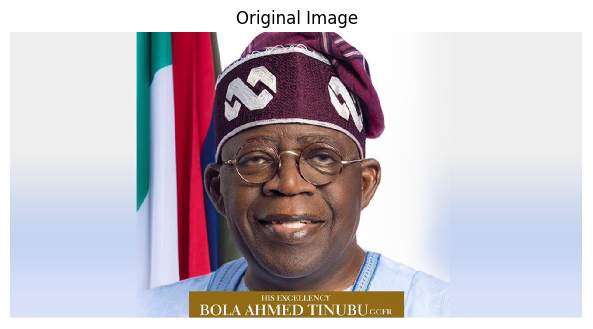

In [3]:

import skimage.io
from skimage.restoration import inpaint
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
import skimage.filters

image_path = "president.jpg"
image = skimage.io.imread(image_path)


damaged_image = skimage.io.imread("president.jpg")
skimage.io.imshow(damaged_image)
plt.title('Original Image')
plt.axis('off')

# Creating the mask

creating a mask, in order to fix the damage, i created a mask by manually through trial and error locating the coordinates. and assigning them to onw while blacking out the rest.

then by usung the inpain which tries to fix the damage by constructing the missing parts using the nighbouring values of the existing pixles


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


(0.0, 1.0, 0.0, 1.0)

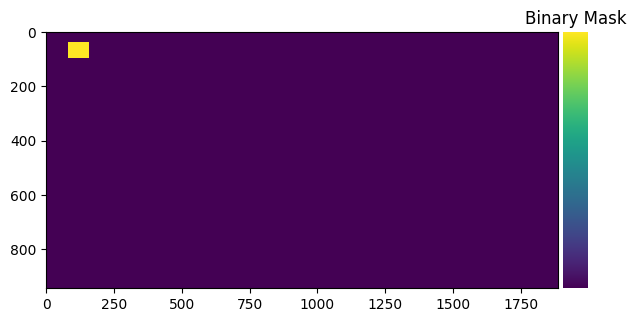

In [4]:
mask = np.zeros(image.shape[:-1])
mask[40:100, 80:160] = 1

skimage.io.imshow(mask)
plt.title('Binary Mask')
plt.axis('off')

# applying the mask

after the mask is created, the inpaint function is applied. an error occured originally when the function took multichannels, but after chaning it to channel axis and assigning it to -1.

(-0.5, 1886.5, 944.5, -0.5)

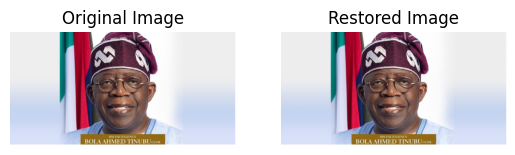

In [6]:
restored_image = skimage.restoration.inpaint_biharmonic(damaged_image, mask,  channel_axis= -1)

f, ax = plt.subplots(1,2)
ax[0].imshow(damaged_image)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(restored_image)
ax[1].set_title('Restored Image')
ax[1].axis('off')

# Task 2: Removing the logo and text

same concept, double filter


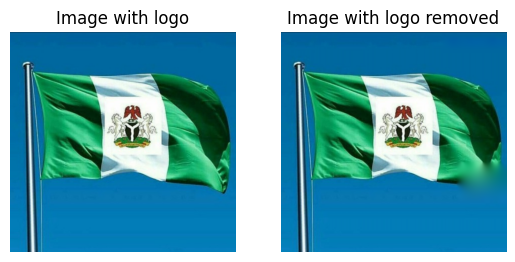

In [9]:
image_with_logo = plt.imread("nigeria.jpg")

mask = np.zeros(image_with_logo.shape[:-1])
mask[10:40, 320:470] = 1
mask[260:340, 350:470] = 1

image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo, mask, channel_axis= -1)





def plot_comparison(image_with_logo, image_logo_removed, param):
    f, ax = plt.subplots(1,2)
    ax[0].imshow(image_with_logo)
    ax[0].set_title('Image with logo')
    ax[0].axis('off')
    ax[1].imshow(image_logo_removed)
    ax[1].set_title(param)
    ax[1].axis('off')


plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')